In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = None  # Initialize df as None
# Use the direct path you provided. The 'r' before the string is important!
file_path = r"C:\Users\DELL\bootcamp_Dhriti_Trivedi\Project\Data\processed\yahoo_data_cleaned.csv"

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded {file_path}")
except FileNotFoundError:
    print(f"ERROR: The file '{file_path}' was not found.")
    print("Please make sure the path is correct and the file exists.")

# --- Proceed only if the DataFrame was loaded successfully ---
if df is not None:
    # --- Data Cleaning and Preparation ---
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)

    # --- Feature Engineering ---
    df['Daily_Return'] = df['Adj Close'].pct_change() * 100
    df['Volume_Change'] = df['Volume'].pct_change() * 100
    df['Volatility'] = ((df['High'] - df['Low']) / df['Adj Close']) * 100
    df['Volume_Change_Lag1'] = df['Volume_Change'].shift(1)
    df_clean = df.dropna()


Successfully loaded C:\Users\DELL\bootcamp_Dhriti_Trivedi\Project\Data\processed\yahoo_data_cleaned.csv



--- Experiment 1: Predicting Daily Returns ---
R-squared value: 0.0002
Conclusion: The R-squared value is near zero, indicating the model has no predictive power.



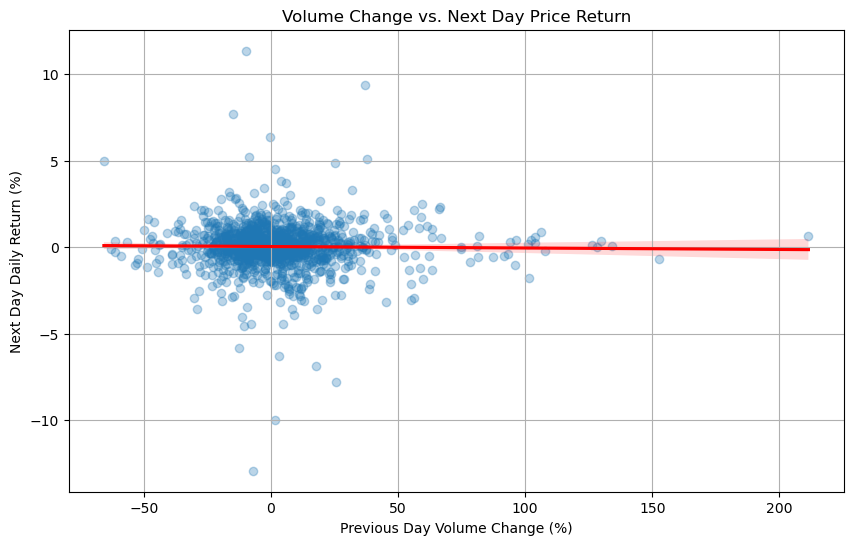

In [6]:

    # ==============================================================================
    # 2. Experiment 1: Predict Daily Returns with Linear Regression
    # ==============================================================================
    print("\n--- Experiment 1: Predicting Daily Returns ---")
    X_reg = df_clean[['Volume_Change_Lag1']]
    y_reg = df_clean['Daily_Return']
    X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42, shuffle=False
    )
    lr_model = LinearRegression()
    lr_model.fit(X_reg_train, y_reg_train)
    y_reg_pred = lr_model.predict(X_reg_test)
    r2 = r2_score(y_reg_test, y_reg_pred)
    print(f"R-squared value: {r2:.4f}")
    print("Conclusion: The R-squared value is near zero, indicating the model has no predictive power.\n")

    # --- Visualization for Experiment 1 ---
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df_clean['Volume_Change_Lag1'], y=df_clean['Daily_Return'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title('Volume Change vs. Next Day Price Return')
    plt.xlabel('Previous Day Volume Change (%)')
    plt.ylabel('Next Day Daily Return (%)')
    plt.grid(True)
    plt.show()

In [ ]:

    # ==============================================================================
    # 3. Experiment 2: Predict Volatility with Logistic Regression
    # ==============================================================================
    print("\n--- Experiment 2: Predicting High/Low Volatility ---")
    median_volatility = df_clean['Volatility'].median()
    df_clean['High_Volatility'] = (df_clean['Volatility'] > median_volatility).astype(int)
    X_clf = df_clean[['Volume_Change_Lag1']]
    y_clf = df_clean['High_Volatility']
    X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
        X_clf, y_clf, test_size=0.2, random_state=42, shuffle=False
    )
    log_model = LogisticRegression()
    log_model.fit(X_clf_train, y_clf_train)
    y_clf_pred = log_model.predict(X_clf_test)
    accuracy = accuracy_score(y_clf_test, y_clf_pred)
    print(f"Accuracy Score: {accuracy:.4f}")
    print("Conclusion: The accuracy is ~52%, which is statistically similar to a random 50/50 guess.")

We can see that this shows a similar accuracy as before. 